# Logistic Regression

Previously, we've looked at linear regression, useful for predicting *continuous variables*. In this workshop we look at logistic regression, with which we can predict *categorical variables* - in other words: *classification*. We'll see that all the concepts introduced for linear regression (e.g. hypothesis, cost function, learning, ...) are useful for logistic regression as well. 

We'll see that logistic regression is actually a single neuron of a neural network. So it's a single decision unit, capable of making simple decisions, whereas a neural network, consisting of multiple neurons, is capable of making complex decisions (i.e. decisions that are based on information of earlier decisions).

This workshop is based on Andrew Ng’s Machine Learning Coursera course. While watching the videos, make notes of the parts that you don’t understand. We’ll discuss these in class.

Please watch the following videos (~60 min.): 
- [Logistic regression: classification](https://www.youtube.com/watch?v=-la3q9d7AKQ&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN&index=32) (8 min.). Concepts: classification.
- [Logistic regression: hypothesis representation](https://www.youtube.com/watch?v=t1IT5hZfS48&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN&index=33) (7 min.). Logistic regression uses the sigmoid function as hypothesis. The hypothesis represents the estimated probability that y=1 on input x.
- [Logistic regression: decision boundary](https://www.youtube.com/watch?v=F_VG4LNjZZw&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN&index=34) (11 min.). Concepts: decision boundary. Please note that if z is a linear function, the decision boundary is a straight line for two features or a flat plane for three features. Non-linear decision boundaries are possible by adding polynomial terms to the z.
- [Logistic regression: cost function](https://www.youtube.com/watch?v=HIQlmHxI6-0&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN&index=35) (11 min.). If we use the cost function that we've used for linear regression, the cost function is not guaranteed to be convex: learning might end up in a local minimum. Therefore the logistic regression cost function is used, which is convex.
- [Logistic regression: simplified cost function and gradient descent](https://www.youtube.com/watch?v=TTdcc21Ko9A&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN&index=36) (10 min.).

# Case description
Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision.

Your task is to build a classification model that estimates an applicant’s probability of admission based on the scores from those two exams.

**Exercise**:
* read the training data ```ex2data1.txt```. It has two features and one output. The first feature is the result of the 1st exam (float between 0-100). The second feature is the result of the 2nd exam (float between 0-100). The output is the admission to the university (integer; 0 means no admission, 1 means admission granted). 
* Save the data in ```X``` and ```y```.
* ```df.head()``` is a convenient way to inspect the first couple of training samples.

**Exercise**: visualize the data. Use a scatter plot with "exam 1 score" on the x-axis, "exam 2 score" on the y-axis, and two colours for "admission" and "no admission". An easy way to separate admitted and not-admitted values in python is by using a mask:
  ```
  mask = y == 1  # y is a column vector, 
  adm = plt.scatter(X[mask][0].values, X[mask][1].values)
  ```
The plot should look similar to:
<img src="https://github.com/sjoerdteunisse/Avans-A.I-Minor/blob/master/Workshop%202/images/dataVisualization.png?raw=true" />

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

!wget https://raw.githubusercontent.com/sjoerdteunisse/Avans-A.I-Minor/master/Workshop%202/data/ex2data1.txt

# read the training data
df = pd.read_csv("ex2data1.txt", header=None)

--2020-09-13 09:29:53--  https://raw.githubusercontent.com/sjoerdteunisse/Avans-A.I-Minor/master/Workshop%202/data/ex2data1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3775 (3.7K) [text/plain]
Saving to: ‘ex2data1.txt’

ex2data1.txt        100%[===================>]   3.69K  --.-KB/s    in 0s      

2020-09-13 09:29:53 (61.5 MB/s) - ‘ex2data1.txt’ saved [3775/3775]



In [2]:
# explore the data
X = df.iloc[:,:-1]
y = df.iloc[:,2]
df.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


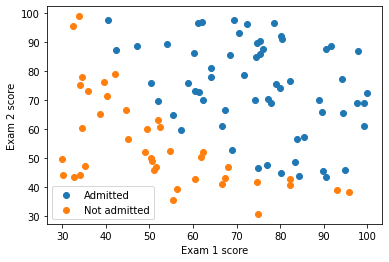

In [3]:
# visualize the data
mask = y == 1
adm = plt.scatter(X[mask][0].values, X[mask][1].values)  # boolean array as mask
not_adm = plt.scatter(X[~mask][0].values, X[~mask][1].values)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))
plt.show()

In [4]:
# prepare the training set
(m, n) = X.shape
ones = np.ones((m, 1))
X = np.hstack((ones, X))  # add X_0
(m, n) = X.shape
y = y[:, np.newaxis]  # convert from vector to matrix; not needed for X, as X is already matrix

We're lazy and skip further data exploration and wrangling and assume that there's no missing data and that there are no outliers. 

We also have already decided that both features are selected for the prediction.

Both features have the same range, so we skip feature normalization (lazy again).

**Exercise**: as explained in the video's, logistic regression uses the sigmoid function. Implement the body of the sigmoid function. The picture shows a number of often-used activation functions.

<img src="https://github.com/sjoerdteunisse/Avans-A.I-Minor/blob/master/Workshop%202/images/activationFunctions.png?raw=true"/>

In [5]:
# by convention, call the function parameter z
def sigmoid(z):
    return 1/(1 + np.exp(-z))

**Exercise**: for linear regression, the hypothesis function was the dot product of $X$ and $\Theta$. For logistic regression, the hypothesis function is the dot product of $X$ and $\Theta$ and the result is passed to the sigmoid function. Implement the body of the hypothesis function for logistic regression, using the sigmoid function defined just above.

In [6]:
# hypothesis
def h(X, theta):
    return sigmoid(X @ theta)  # alternative way of writing dot product

**Exercise**: implement the body of cost function for logistic regression. You can do this based on the picture just below, which already looks quite impressive. The video's have explained why the cost function for logistic regression has this form. To implement the body of the function, you don't need to understand this. You "only" need to transform the mathematical notation into python.
* Use ```np.log``` to calculate the logarithm.
* Use ```np.multiply``` to element-wise multipy ```y``` and ```np.log(h(X, theta))```.
* Use ```np.multiply``` to element-wise multipy ```1-y``` and ```np.log(1 - h(X, theta))```.
* Use ```np.sum``` to do the summation.
* Don't forget to multiply by ```(-1/m)```


<img src="https://github.com/sjoerdteunisse/Avans-A.I-Minor/blob/master/Workshop%202/images/logisticRegressionCostFunction.png?raw=true"/>



In [7]:
# cost function
def J(X, y, theta):
    # np.multiply performs elementwise multiplication
    return (-1/m) * np.sum(np.multiply(y, np.log(h(X, theta))) + np.multiply((1-y), np.log(1 - h(X, theta))))

**Exercise**: implement the body of the gradient function for logistic regression, based on the picture just below. As you have seen in the video's, the gradient is identical to the one of linear regression (except that $h$ is the sigmoid function instead of a linear function)! So this is an easy exercise.

<img src="https://github.com/sjoerdteunisse/Avans-A.I-Minor/blob/master/Workshop%202/images/gradient.png?raw=true"/>



In [8]:
# gradient
def grad(X, y, theta):
    return (1/m) * X.T @ (h(X, theta) - y) # simultaneous update

In [9]:
# freehand test of cost function and gradient
theta = np.zeros((n, 1)) # intializing theta with all zeros
print(J(X, y, theta))  # should give 0.6931471805599453
np.testing.assert_array_almost_equal_nulp(J(X, y, theta), 0.6931471805599453)
print(grad(X, y, theta))  # should give [[-0.1] [-12.009216589291151] [-11.262842205513593]]
np.testing.assert_array_almost_equal_nulp(grad(X, y, theta), [[-0.1], [-12.009216589291151], [-11.262842205513593]])

0.6931471805599453
[[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]


In [10]:
# learning algorithm for logsitic regression (identical to the one in the hands-on about linear regression!)
def gradientDescent(X, y, theta, alpha, num_iters):
    J_history = []
    for _ in range(num_iters):
        theta -= alpha * grad(X, y, theta)
        J_history.append(J(X, y, theta))  # to allow displaying cost as a function of #iters
    return theta, J_history

In [ ]:
# perform learning (identical to the one in the hands-on about linear regression!)
num_iters = 150000 # hyper parameter number of iterations
alpha = 0.002  # hyper parameter learning rate
theta, J_history = gradientDescent(X, y, theta, alpha, num_iters)
print("theta: " + str(theta))  # should be [[-10.901] [0.0925] [0.0864]]
print("cost J: " + str(J(X, y, theta)))  # should be 0.261

In [ ]:
# plot cost function as a function of #iterations
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function convergence as a function of #iterations")
plt.show()  # please notice the problems the algorithm has to converge

In [ ]:
# plot decision boundary
mask = y.flatten() == 1
adm = plt.scatter(X[mask][:,1], X[mask][:,2])
not_adm = plt.scatter(X[~mask][:,1], X[~mask][:,2])

x_value = np.array([np.min(X[:,1]), np.max(X[:,1])])
y_value = -(theta[0] + theta[1] * x_value)/theta[2]
plt.plot(x_value, y_value, "r")

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))
plt.show()

In [ ]:
def accuracy(X, y, theta):
    pred = h(X, theta) >= 0.5
    print("type(pred):", pred[0], y[0])
    acc = np.mean(np.array(pred) == y)
    return acc * 100

print("accuracy = " + str(accuracy(X, y, theta)))  # should be 91%

Just above, the plot that shows cost function as a function of #iterations, had some problems to converge. Let's try a more sophisticated optimizer than gradient descent: fmin_tnc from the scipy library.

In [ ]:
# perform learning, but use a more sophisticated optimizer than gradient descent: fmin_tnc
import scipy.optimize as opt

# Slight inconvenience, fmin_tnc expects the parameters of the cost function and the gradient in a different order. 
# We redfine the functions with the required parameter order
def J_(theta, X, y):
    return J(X, y, theta)
def grad_(theta, X, y):
    return grad(X, y, theta)

# to allow displaying cost as a function of #iters
J_history = []
def callbackF(theta):
    J_history.append(J(X, y, theta[:, np.newaxis]))  # transform theta from vector to matrix
    
theta = np.zeros((n, 1))  # re-intialize theta 
result = opt.fmin_tnc(func=J_, 
                    x0=theta.flatten(), 
                    fprime=grad_, 
                    args=(X, y.flatten()),
                    callback=callbackF)

theta = result[0][:, np.newaxis]  # transform theta from vector to matrix
print("number of performed evaluation steps " + str(result[1])) 
print("theta optimized: " + str(theta))  # should be [-25.16131862   0.20623159   0.20147149]
print("cost J: " + str(J(X, y, theta)))  # should be 0.20349770158947464

**Exercise**:
* plot cost function as a function of #iterations
* plot decision boundary
* calculate accuracy

In [ ]:
# plot cost function as a function of #iterations
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function convergence as a function of #iterations, using the fmin_tnc optimizer")
plt.show()

In [ ]:
# plot decision boundary
mask = y.flatten() == 1
adm = plt.scatter(X[mask][:,1], X[mask][:,2])
not_adm = plt.scatter(X[~mask][:,1], X[~mask][:,2])

x_value = np.array([np.min(X[:,1]), np.max(X[:,1])])
y_value = -(theta[0] + theta[1] * x_value)/theta[2]
plt.plot(x_value, y_value, "r")

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))
plt.show()

In [ ]:
# accuracy
print("accuracy = " + str(accuracy(X, y, theta)))  # should be 89%

***

**Discussion**: when defining the hypothesis we've chosen:
* $z = x \cdot \Theta$ (so a linear function of the features x1 and x2)
* $h_\Theta(x) = sigmoid(z)$
This means that the decision boundary is a straight line. Considering the obtained accuracy, this seems to be a fair choice.

We could add polynomial terms $(x_1)^2$, $x_1x_2$ and $(x_2)^2$ as additional features. This allows the decision boundary to become curved, which allows for a higher accuracy on the training set. We could even add higher order polynomial terms like x1^3 and x2^3 as additional features. Continuing to do so, we can reach an accuracy of 100%. 

**Question**: do you think this is a wise move?